In [30]:
import pandas as pd 
import json

import matplotlib.pyplot as plt
import seaborn as sns

# Display figures inline in Jupyter notebook
%matplotlib inline

plt.rcParams.update({'font.size': 30})


In [31]:
df = pd.read_csv("museum_data.csv") 

In [32]:
for i in range(len(df)):
    predictions = json.loads(df.prediction.at[i])
    df.prediction.at[i] = predictions[0]['location']

# Cambio Timestamps (EPOC) a datetime de Pandas
df.timestamp = pd.to_datetime(df.timestamp, unit='ms')
df.timestamp = pd.to_datetime(df.timestamp.astype(str)) - pd.DateOffset(hours=3)

# Setear indice del DataFrame como los datetime
df.index = pd.to_datetime(df.timestamp, unit='ms')

# Ignoro datos con predicciones fuera del museo
df = df[df.prediction != '?']


In [33]:
# Agrego datos al DF

df['hour'] = df.index.hour
df['day'] = df.index.weekday_name
df['date'] = df.index.date


In [41]:
d='2018-11-08 00:00:01' 
date=pd.to_datetime(d).date()
df = df[df.date != date]
len(df2)

111136

In [5]:
pd.value_counts(df.prediction)

location_10    16379
location_7     14943
location_6     12985
location_5     11881
location_14    11590
location_4     10728
location_8      9201
location_12     8300
location_3      7745
location_1      7611
location_15     7027
location_16     5915
location_9      4939
location_13     4627
location_11     3423
location_2      2488
Name: prediction, dtype: int64

In [6]:
hourly_count = pd.value_counts(df.hour, sort=False)
hourly_count = hourly_count[hourly_count > 50]
hourly_count

10       72
11      449
12      598
13     3854
14    10224
15     7611
16    13805
17    12686
18    35489
19    30386
20    14248
21     8856
22      787
23      679
Name: hour, dtype: int64

In [7]:
daily_count = pd.Categorical(df.day, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
daily_count = pd.value_counts(daily_count, sort=False)
daily_count = daily_count.rename({
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado', 
    'Sunday': 'Domingo'
})
daily_count

Lunes         4467
Martes       22857
Miércoles    15226
Jueves       47072
Viernes      11274
Sábado       15294
Domingo      23592
dtype: int64

In [8]:
prediction_count = pd.value_counts(df.prediction)

In [9]:
prediction_count

location_10    16379
location_7     14943
location_6     12985
location_5     11881
location_14    11590
location_4     10728
location_8      9201
location_12     8300
location_3      7745
location_1      7611
location_15     7027
location_16     5915
location_9      4939
location_13     4627
location_11     3423
location_2      2488
Name: prediction, dtype: int64

In [10]:
def save_figure(pd_serie, file_name, x_label, y_label='Clasificaciones realizadas'):
    plot = pd_serie.plot(kind='bar', figsize=(15,15), fontsize=18)
    plot.set_xlabel(x_label, fontsize=18)
    plot.set_ylabel(y_label, fontsize=18)
    fig = plot.get_figure()
    fig.savefig(f'{file_name}.svg', format="svg")
    

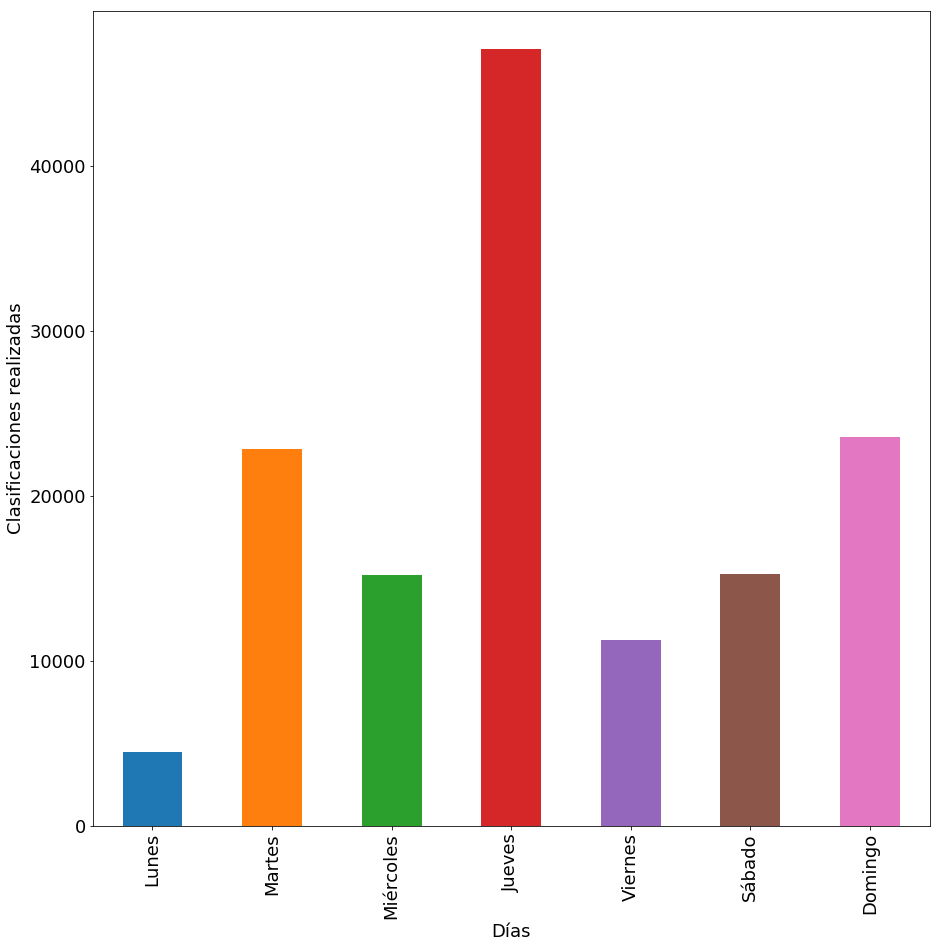

In [11]:
save_figure(daily_count, 'usuarios_dia', 'Días')

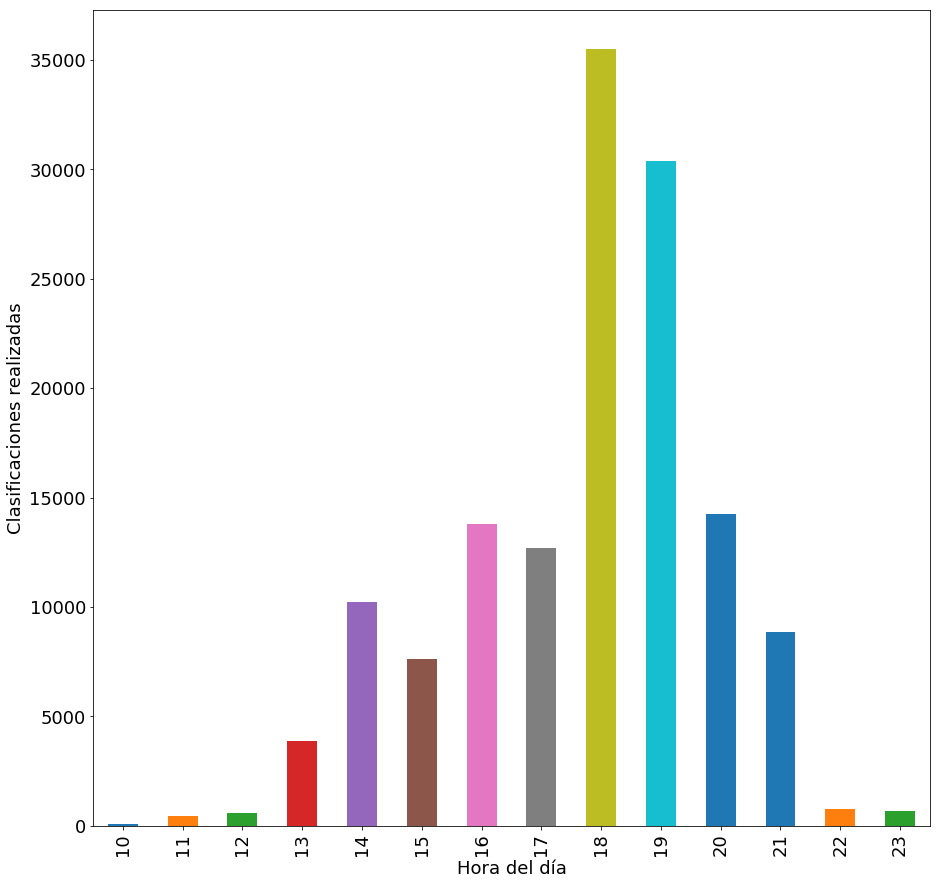

In [12]:
save_figure(hourly_count, 'usuarios_hora', 'Hora del día')

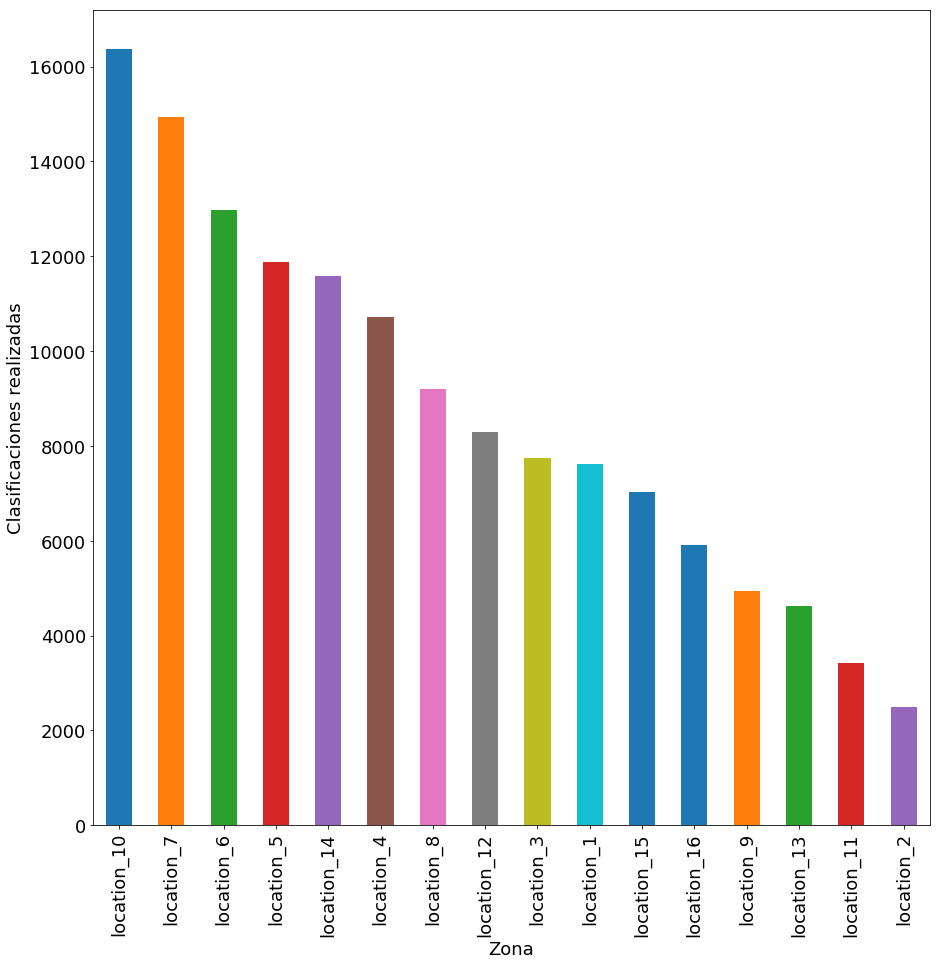

In [13]:
save_figure(prediction_count, 'usuarios_zona', 'Zona')